In [2]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [3]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [4]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

In [5]:
def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

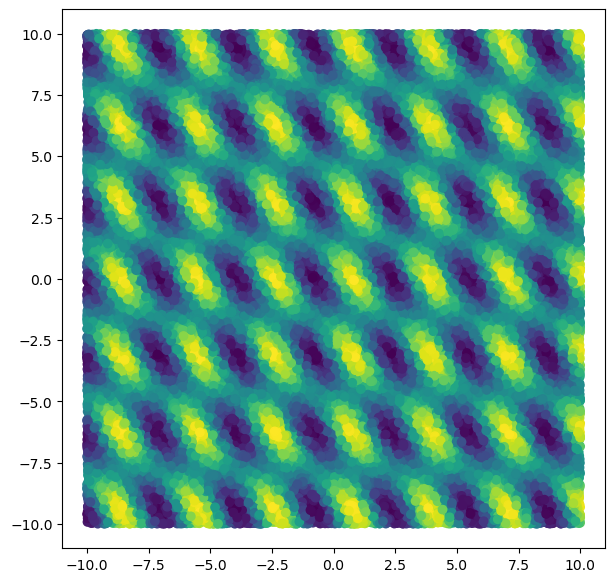

In [6]:
graph_continuous(sincos, 10, 10, x_random = True, n_samples= 100000, y_random = True)

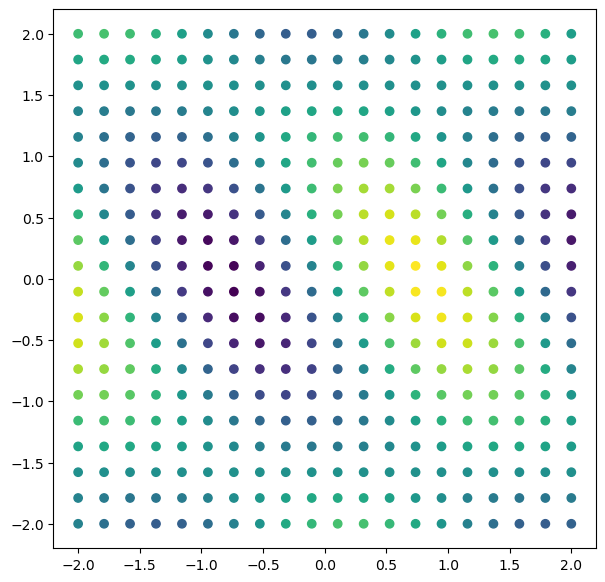

In [6]:
view_window_continuous(sincos, 20, 4)

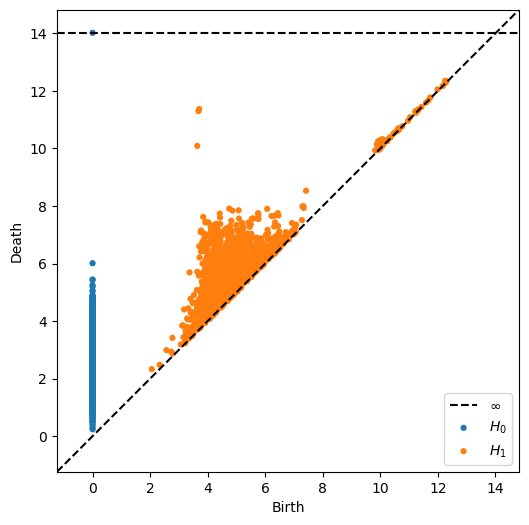

In [6]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

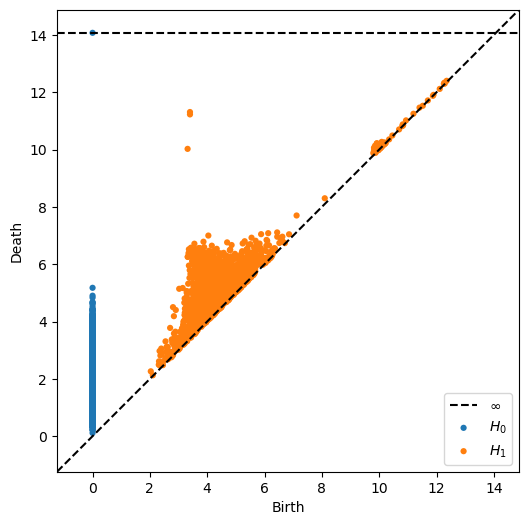

In [9]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

**There seems to be 3 classes in $H_1$ over $\mathbb{Z}_2$** 

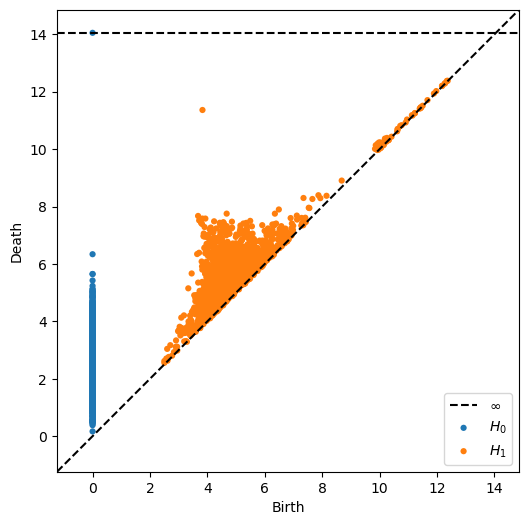

In [27]:
output = pipeline(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 2000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

**There seems to be 1 class in $H_1$ over $\mathbb{Z}_3$** 

**Looking at only translations**

In [5]:
def generate_isom_trans(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(np.zeros(2*n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i]))
    return isos_inv

def pipeline_trans(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

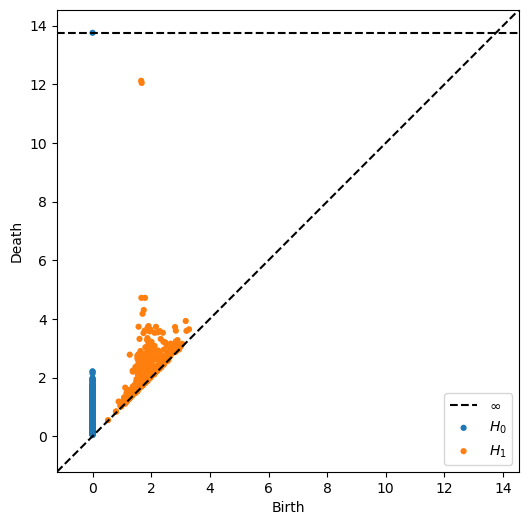

In [6]:
output = pipeline_trans(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

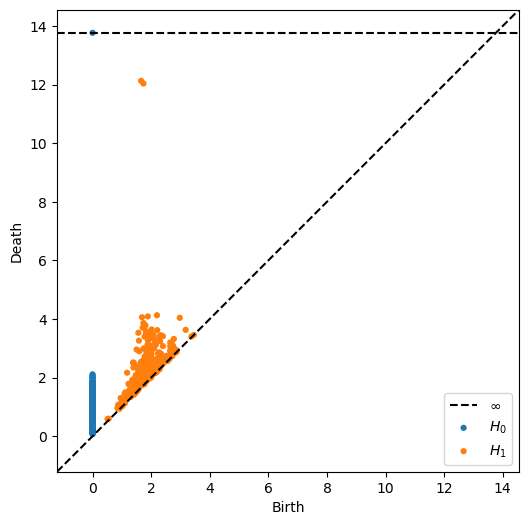

In [7]:
output = pipeline_trans(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 1000, x_translate= 10 , y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

Looking into cocyles....

In [35]:
def p_hom_cocyles(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff, do_cocycles = True)
    return output
def pipeline_cocyles(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom_cocyles(M, maxdim, coeff)
    return output
output = pipeline_cocyles(image_function = sincos, num_pixels = 20 , window_size = 4, n_isos = 3000, x_translate= 10 , y_translate=10, maxdim=1, coeff=2)


In [44]:
len(output['cocycles'][1])

1902

In [45]:
len(output['dgms'][1])

1902

every element in the persistent diagram has a corresponding element in the cocyles 

In [46]:
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

In [64]:
def persist_cocycles(output):
    H1 = list(output['dgms'][1])
    cocyles = list(output['cocycles'][1])
    
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0])
        
    dictionary = {}
    for i in range(len(H1)):
        dictionary[d[i]] = cocyles[i]
        
    myKeys = list(dictionary.keys())
    myKeys.sort(reverse=True)
    sorted_dict = {i: dictionary[i] for i in myKeys}
    
    return sorted_dict
    

In [66]:
cocycle = persist_cocycles(output)
# dictionary that contains length of barcode and array of elements that create the cycle in H1
# seems like somehow each "vertex" has been assigned an index
# so vector [i,j,1] in the array indicates that the 1-simplex spanned by vertices (i,j) appears in the cycle (once?)

In [69]:
cocycle[list(cocycle.keys())[0]]

array([[1428,  176,    1],
       [2088, 2014,    1],
       [2045,   29,    1],
       ...,
       [1877, 1786,    1],
       [2896, 2405,    1],
       [2949, 1115,    1]])

In [1]:
def generate_isom_trans(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(np.zeros(2*n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv


def pipeline_trans(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom_trans(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


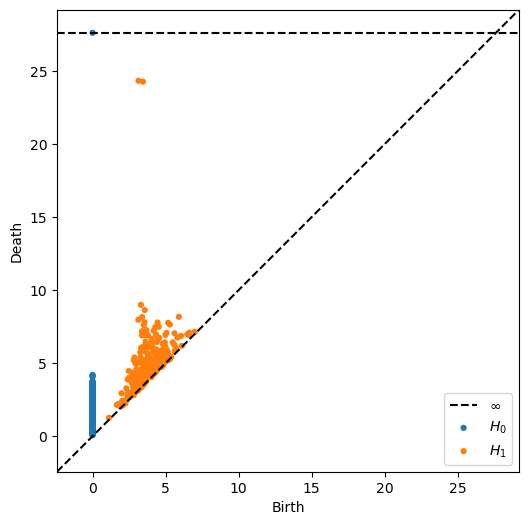

In [7]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 5, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [8]:
persistent_H1_intervals(output)

[21.18502688407898,
 20.815353870391846,
 5.682892322540283,
 5.060614824295044,
 4.8392088413238525,
 4.763098239898682,
 4.2446253299713135,
 4.102130651473999,
 3.804114818572998,
 3.581407070159912,
 3.5265567302703857,
 3.5241568088531494,
 3.36244797706604,
 3.330104351043701,
 3.315798282623291,
 3.250920295715332,
 3.168112277984619,
 3.156858205795288,
 3.153998613357544,
 3.026139736175537,
 2.9620189666748047,
 2.8470349311828613,
 2.7030045986175537,
 2.69986891746521,
 2.637028217315674,
 2.610585927963257,
 2.610138416290283,
 2.5889735221862793,
 2.515428066253662,
 2.47296142578125,
 2.402008533477783,
 2.3960893154144287,
 2.354358673095703,
 2.3477096557617188,
 2.3107502460479736,
 2.2959656715393066,
 2.2959511280059814,
 2.2588047981262207,
 2.226426124572754,
 2.2243685722351074,
 2.217076301574707,
 2.1831531524658203,
 2.15999698638916,
 2.1197285652160645,
 2.0503101348876953,
 2.048903465270996,
 2.013753890991211,
 1.9759316444396973,
 1.9510633945465088,
 1.

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


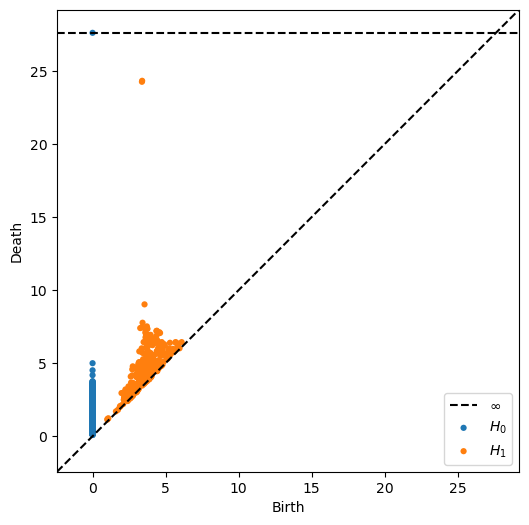

In [9]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 5, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=3)
plot_dgms(output)

In [10]:
persistent_H1_intervals(output)

[20.94044256210327,
 20.888723850250244,
 5.468008041381836,
 4.347690105438232,
 4.139941215515137,
 4.080674648284912,
 3.7996509075164795,
 3.627201557159424,
 3.587907075881958,
 3.485959529876709,
 3.234438896179199,
 3.1982195377349854,
 3.138852834701538,
 3.097757339477539,
 2.9641475677490234,
 2.9485466480255127,
 2.874572992324829,
 2.8693621158599854,
 2.8343822956085205,
 2.833258628845215,
 2.831191062927246,
 2.8210792541503906,
 2.749133586883545,
 2.6501293182373047,
 2.612086772918701,
 2.6079931259155273,
 2.5960288047790527,
 2.544924259185791,
 2.494875431060791,
 2.489515542984009,
 2.4454078674316406,
 2.405704975128174,
 2.4014828205108643,
 2.3577375411987305,
 2.330817699432373,
 2.2706003189086914,
 2.1821746826171875,
 2.1650309562683105,
 2.155550956726074,
 2.129624843597412,
 2.1262192726135254,
 2.1245265007019043,
 2.030705451965332,
 2.0029296875,
 1.97214937210083,
 1.8795857429504395,
 1.8706634044647217,
 1.8654918670654297,
 1.8580880165100098,
 1.

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


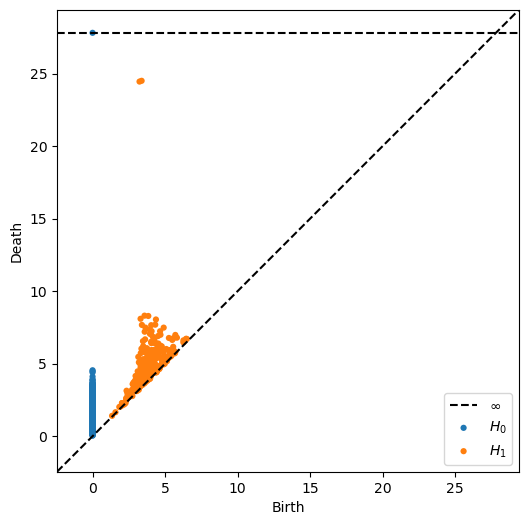

In [11]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 10, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [12]:
persistent_H1_intervals(output)

[21.211451530456543,
 21.121365547180176,
 4.785757064819336,
 4.7275071144104,
 4.444917917251587,
 4.2689197063446045,
 3.8393754959106445,
 3.6772871017456055,
 3.609975576400757,
 3.6097798347473145,
 3.4211294651031494,
 3.366347312927246,
 3.1721115112304688,
 3.0943286418914795,
 3.0921621322631836,
 3.076965808868408,
 3.0530452728271484,
 2.7242255210876465,
 2.7182905673980713,
 2.662260055541992,
 2.5812034606933594,
 2.5773468017578125,
 2.4675817489624023,
 2.4401893615722656,
 2.4032833576202393,
 2.3905696868896484,
 2.384681224822998,
 2.3597373962402344,
 2.3161606788635254,
 2.312713384628296,
 2.3097658157348633,
 2.3078253269195557,
 2.22800350189209,
 2.2206621170043945,
 2.167070150375366,
 2.0580108165740967,
 1.9707121849060059,
 1.9061253070831299,
 1.8990778923034668,
 1.885096549987793,
 1.8667974472045898,
 1.858497142791748,
 1.8182566165924072,
 1.795473575592041,
 1.778017282485962,
 1.7711396217346191,
 1.7524714469909668,
 1.7488188743591309,
 1.7060508

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


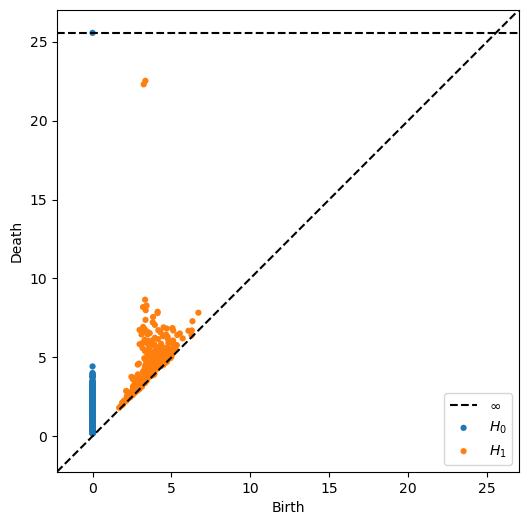

In [19]:
output = pipeline_trans(image_function = sincos, num_pixels = 40 , window_size = 2, n_isos = 1000, x_translate= 100 , y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

In [20]:
persistent_H1_intervals(output)

[19.174669981002808,
 19.054831504821777,
 5.319900989532471,
 4.987330436706543,
 4.862091064453125,
 4.61489200592041,
 4.015774965286255,
 3.763960361480713,
 3.7589211463928223,
 3.720496892929077,
 3.7195539474487305,
 3.6834936141967773,
 3.489825487136841,
 3.3968684673309326,
 3.3558192253112793,
 3.3402247428894043,
 3.117861747741699,
 3.106898069381714,
 3.0962986946105957,
 2.961564302444458,
 2.9129345417022705,
 2.8546950817108154,
 2.803790807723999,
 2.741239070892334,
 2.5549869537353516,
 2.516432523727417,
 2.4537081718444824,
 2.417907476425171,
 2.397149085998535,
 2.35017466545105,
 2.327598810195923,
 2.297600030899048,
 2.282318592071533,
 2.2788240909576416,
 2.272207260131836,
 2.269474506378174,
 2.148116111755371,
 2.1162843704223633,
 2.1059176921844482,
 2.105213165283203,
 2.0962975025177,
 2.0688493251800537,
 2.00064754486084,
 1.9875390529632568,
 1.9479975700378418,
 1.9005746841430664,
 1.8678526878356934,
 1.7919178009033203,
 1.7863686084747314,
 1

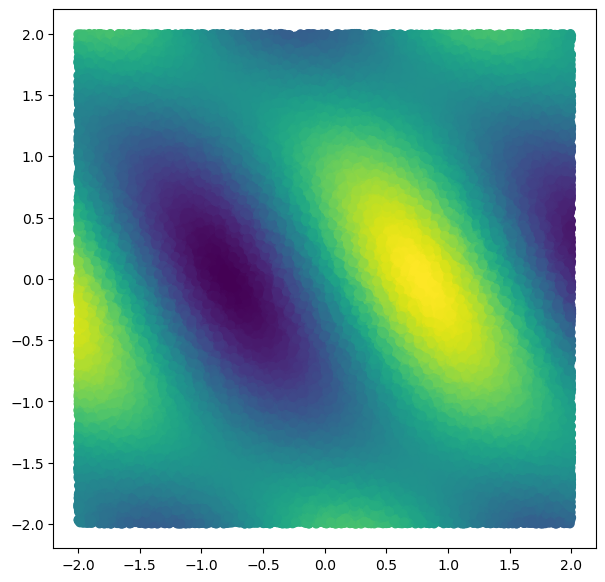

In [18]:
graph_continuous(sincos, 2, 2, x_random = True, n_samples= 100000, y_random = True)